In [17]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("/Users/eric/Desktop/titanic.csv")

# 1.Show data:

In [9]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# 2.Describe Data

In [10]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# 3.Show relationship between the Fare paid and the Survival

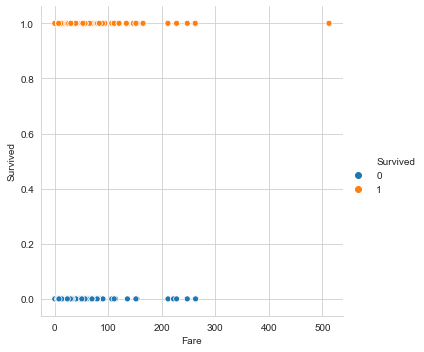

In [56]:
#From the graph below, look at the relationship of number of people survived and fare as a whole, it is hard for
#us to see correlation between the two, so we need to make some cutoffs to see the data more clearly
sns.relplot(x="Fare", y="Survived", hue="Survived", data = df);

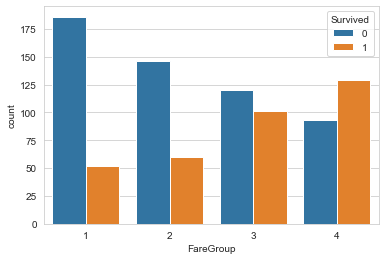

In [59]:
#By looking at the descriptions of the Fare in the above chart, we can see the cutoffs of the 4 quatiles,
#therefore, we can show the survival count by Fare groups.
conditions = [
    (df['Fare'] <= 7.92500),
    (df['Fare'] > 7.92500) & (df['Fare'] <= 14.45420),
    (df['Fare'] > 14.45420) & (df['Fare'] <= 31.13750),
    (df['Fare'] > 31.13750)]
choices = ['1', '2', '3', '4']
df['FareGroup'] = np.select(conditions, choices)
sns.countplot(x = 'FareGroup', hue='Survived', data=df)

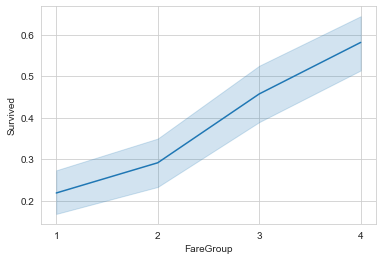

In [58]:
#From this line graph that is grouped by the fare group, we can see clearly that as the fair increases
#the survival rate increses, which means fare and survival rate has positive correlation
df.groupby('FareGroup')
sns.lineplot(x = 'FareGroup', y = 'Survived', data = df)

Other things related to Fare and survival rate, such as Pclass, and Age

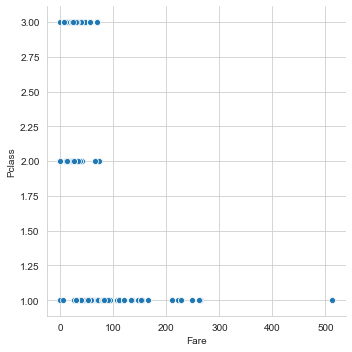

In [24]:
#This graph shows that people pay higher fare for higher classes cabins, as shown in the graph, 
#cabin 1 is more expensive than cabin 2 and 3
sns.relplot(x="Fare", y="Pclass",
            data=df);

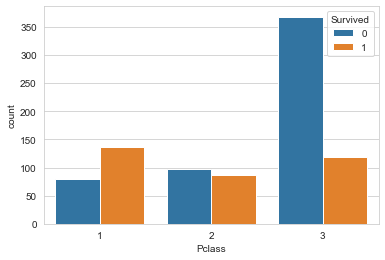

In [28]:
#This graph shows that more people died in the lower class cabine which is class 3, since people paid more fare for better 
#classes, it could then be infered that people who paid less are more likely to die during the accident
sns.countplot(x = df['Pclass'], hue = df['Survived'], data = df)

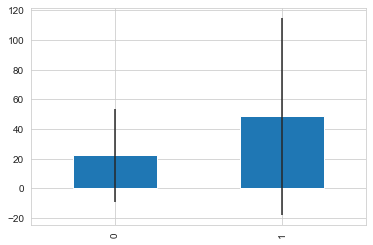

In [29]:
#The graph below shows that the average fare of the people who survivied in the accident are higher than the fare paid by 
# the people who died in the accident
fare_not_survived = df['Fare'][df['Survived'] == 0]
fare_survived = df['Fare'][df['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

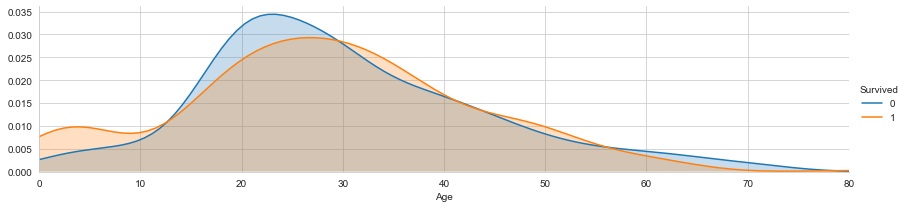

In [37]:
#This shows the survival rate for different age groups
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

In conclusion, the folks who paid more fare are more likely to survive during the titanic accident.